# About this Notebook:
In this notebook, two separate models for each of three different crypto currency icluding Cardano (ADA), Bitcoin (BTC), and Ethereum (ETH) have been trained.

## The Models:
For each one of the crypto currencies, a simple feed-forward neural network and an LSTM model has been trained. The reason was to see how much difference an LSTM model make when it comes to the time series dataset.

## The Target
The next day closing price has been used as the target of each day features.

## Feature Engineering
In order to include the impact of the previous days prices in the simple feed-forward neural network model, the MA5, MA10, and MA20 features have been generated which are the average of closing price for past 5, 10, and 20 days. As a result, to not have a null data, the first 19 days has been removed from the dataset (as they don't have the past 20 days price average).

### 1- Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

2024-07-21 16:04:08.276099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2- Importing Dataset into data frames

In [2]:
# Load the dataset
ADA = pd.read_csv('/Users/kavian/Desktop/Crypto/Github/Crypto-Prediction/ADA.csv')
BTC = pd.read_csv('/Users/kavian/Desktop/Crypto/Github/Crypto-Prediction/BTC.csv')
ETH = pd.read_csv('/Users/kavian/Desktop/Crypto/Github/Crypto-Prediction/ETH.csv')

### 3- Cardano (ADA)
From this point, investigating the Cardano (ADA) dataset and training its models starts.

In [3]:
ADA.head()

,ticker,date,open,high,low,close
0,ADA,2017-12-30,0.4955,0.6941,0.4200,0.5900
1,ADA,2017-12-31,0.5900,0.7400,0.5900,0.7100
2,ADA,2018-01-01,0.7100,0.7150,0.6320,0.7022
3,ADA,2018-01-02,0.7022,0.8000,0.6750,0.7620
4,ADA,2018-01-03,0.7620,1.1000,0.7601,1.1000


#### 3-1 Feature Engineering
In order to include the impact of the previous days prices in the simple feed-forward neural network model, the MA5, MA10, and MA20 features have been generated which are the average of closing price for past 5, 10, and 20 days. As a result, to not have a null data, the first 19 days has been removed from the dataset (as they don't have the past 20 days price average).

In [4]:
# Feature engineering for ADA
ADA['ADA MA5'] = ADA['close'].rolling(window=5).mean()
ADA['ADA MA10'] = ADA['close'].rolling(window=10).mean()
ADA['ADA MA20'] = ADA['close'].rolling(window=20).mean()
ADA = ADA.dropna()

In [5]:
ADA.head()

,ticker,date,open,high,low,close,ADA MA5,ADA MA10,ADA MA20
19,ADA,2018-01-18,0.6250,0.6996,0.6000,0.6500,0.69084,0.74947,0.822445
20,ADA,2018-01-19,0.6500,0.6964,0.5890,0.6441,0.65966,0.73288,0.825150
21,ADA,2018-01-20,0.6479,0.7263,0.6400,0.7048,0.64662,0.72571,0.824890
22,ADA,2018-01-21,0.7049,0.7049,0.5765,0.6100,0.64662,0.71871,0.820280
23,ADA,2018-01-22,0.6165,0.6400,0.5100,0.5675,0.63528,0.68596,0.810555


#### 3-2 Plotting the features (Prices) over the time

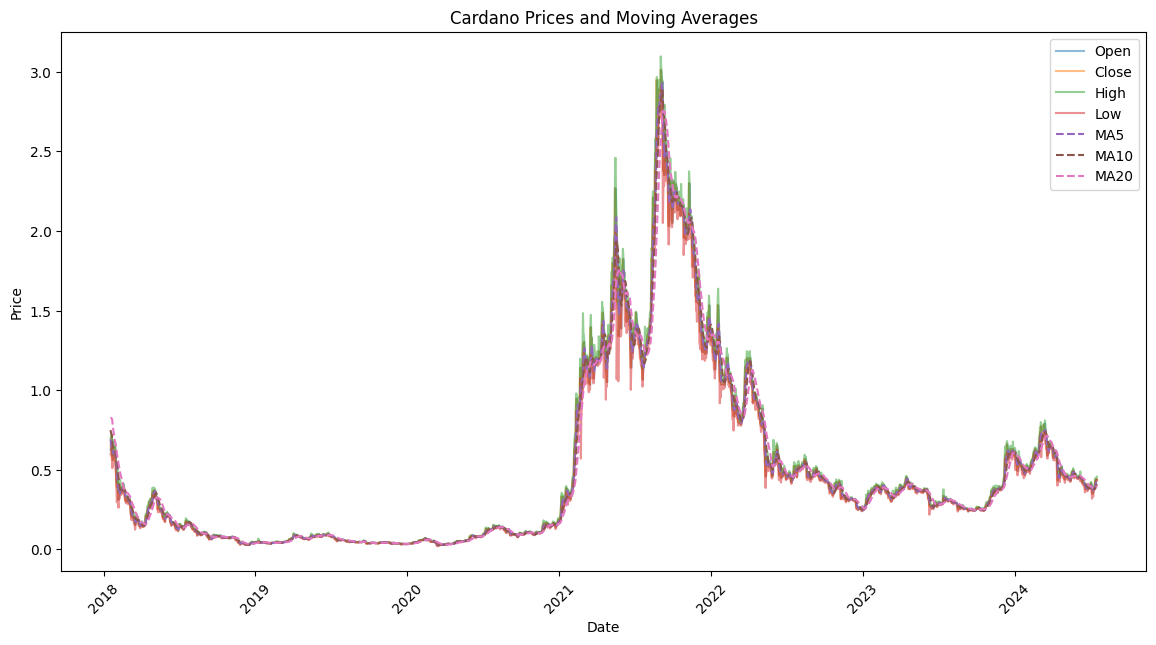

In [6]:
# Parse the Date column to datetime
ADA['date'] = pd.to_datetime(ADA['date'])

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot Open, Close, High, Low prices
plt.plot(ADA['date'], ADA['open'], label='Open', alpha=0.5)
plt.plot(ADA['date'], ADA['close'], label='Close', alpha=0.5)
plt.plot(ADA['date'], ADA['high'], label='High', alpha=0.5)
plt.plot(ADA['date'], ADA['low'], label='Low', alpha=0.5)

# Plot Moving Averages
plt.plot(ADA['date'], ADA['ADA MA5'], label='MA5', linestyle='--')
plt.plot(ADA['date'], ADA['ADA MA10'], label='MA10', linestyle='--')
plt.plot(ADA['date'], ADA['ADA MA20'], label='MA20', linestyle='--')

# Add titles and labels
plt.title('Cardano Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


#### 3-3 Adding the next day close price as the target of each day features

In [7]:
# Create the target variable (next day's closing price)
ADA['Next_Close'] = ADA['close'].shift(-1)
ADA = ADA.dropna()

In [8]:
ADA.isnull().sum()

ticker        0
date          0
open          0
high          0
low           0
close         0
ADA MA5       0
ADA MA10      0
ADA MA20      0
Next_Close    0
dtype: int64

In [9]:
ADA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2372 entries, 19 to 2390
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ticker      2372 non-null   object        
 1   date        2372 non-null   datetime64[ns]
 2   open        2372 non-null   float64       
 3   high        2372 non-null   float64       
 4   low         2372 non-null   float64       
 5   close       2372 non-null   float64       
 6   ADA MA5     2372 non-null   float64       
 7   ADA MA10    2372 non-null   float64       
 8   ADA MA20    2372 non-null   float64       
 9   Next_Close  2372 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 203.8+ KB


In [10]:
# Select features and target
ADA_features = ADA[['open', 'low', 'high', 'close', 'ADA MA5', 'ADA MA10', 'ADA MA20']]
ADA_target = ADA['Next_Close']

In [11]:
ADA_features

,open,low,high,close,ADA MA5,ADA MA10,ADA MA20
19,0.625000,0.600000,0.699600,0.650000,0.690840,0.749470,0.822445
20,0.650000,0.589000,0.696400,0.644100,0.659660,0.732880,0.825150
21,0.647900,0.640000,0.726300,0.704800,0.646620,0.725710,0.824890
22,0.704900,0.576500,0.704900,0.610000,0.646620,0.718710,0.820280
23,0.616500,0.510000,0.640000,0.567500,0.635280,0.685960,0.810555
...,...,...,...,...,...,...,...
2386,0.393588,0.391998,0.418003,0.411218,0.386717,0.379264,0.385218
2387,0.411178,0.410692,0.446086,0.438965,0.400734,0.382377,0.388010
2388,0.439022,0.425190,0.445016,0.436571,0.412700,0.388186,0.391016
2389,0.436571,0.431193,0.443467,0.437809,0.423610,0.396905,0.393255


In [12]:
ADA_features.shape

(2372, 7)

In [13]:
ADA_target

19      0.644100
20      0.704800
21      0.610000
22      0.567500
23      0.560100
          ...   
2386    0.438965
2387    0.436571
2388    0.437809
2389    0.438220
2390    0.440910
Name: Next_Close, Length: 2372, dtype: float64

In [14]:
ADA_target.shape

(2372,)

In [15]:
print(f'Cardano (ADA) Features Shape: {ADA_features.shape}')
print(f'Cardano (ADA) Target Shape: {ADA_target.shape}')

Cardano (ADA) Features Shape: (2372, 7)
Cardano (ADA) Target Shape: (2372,)


#### 3-4 Normalizing Features and Target

In [16]:
# Normalizing the features
ADA_scaler = MinMaxScaler()

ADA_features_scaled = ADA_scaler.fit_transform(ADA_features)

In [17]:
ADA_features_scaled

array([[0.20120472, 0.2013272 , 0.21920748, ..., 0.22912335, 0.25269146,
        0.29152756],
       [0.20957082, 0.1975174 , 0.2181653 , ..., 0.21838037, 0.24688486,
        0.29252086],
       [0.20886807, 0.21518102, 0.22790322, ..., 0.21388747, 0.24437531,
        0.29242538],
       ...,
       [0.13896829, 0.14078253, 0.13629379, ..., 0.133291  , 0.12623985,
        0.13310388],
       [0.13814808, 0.14286165, 0.13578931, ..., 0.13705001, 0.12929159,
        0.13392588],
       [0.1385791 , 0.14128993, 0.13878006, ..., 0.14013247, 0.13168455,
        0.13487173]])

In [18]:
ADA_features_scaled.shape

(2372, 7)

In [19]:
# Normalizing Targets

ADA_target_scaler = MinMaxScaler()

target_ADA = ADA_target.values.reshape(-1, 1)
ADA_target_scaled = ADA_target_scaler.fit_transform(target_ADA)

In [20]:
ADA_target_scaled

array([[0.20752697],
       [0.22783307],
       [0.19611943],
       ...,
       [0.13851602],
       [0.13865351],
       [0.1395534 ]])

In [21]:
ADA_target_scaled.shape

(2372, 1)

#### 3-5 Preparing dataset for training

In [22]:
# Train-test split
X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(ADA_features_scaled, ADA_target_scaled, test_size=0.2, random_state=42)


#### 3-6 Designing the feed-forward Model

In [23]:
# Build the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [24]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_squared_error'])

In [25]:
# Early stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [26]:
# Train the model
ADA_history = model.fit(X_train_ADA, y_train_ADA, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
24/24 [==============================] - 1s 9ms/step - loss: 0.0584 - mean_squared_error: 0.0120 - val_loss: 0.0166 - val_mean_squared_error: 6.3962e-04
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0328 - mean_squared_error: 0.0037 - val_loss: 0.0131 - val_mean_squared_error: 6.0329e-04
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0296 - mean_squared_error: 0.0034 - val_loss: 0.0146 - val_mean_squared_error: 6.5686e-04
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0262 - mean_squared_error: 0.0026 - val_loss: 0.0114 - val_mean_squared_error: 4.1894e-04
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0271 - mean_squared_error: 0.0032 - val_loss: 0.0113 - val_mean_squared_error: 4.7040e-04
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0255 - mean_squared_error: 0.0025 - val_loss: 0.0124 - val_mean_squared_error: 5.1109e-04
Epoch 7/50
24/24

#### 3-7 Plotting the training curves to understand the model performance

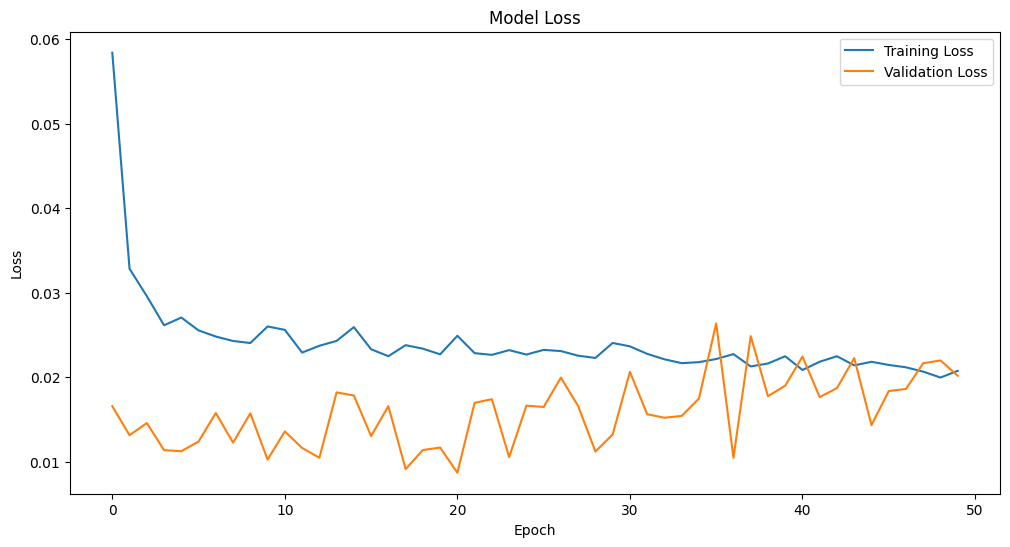

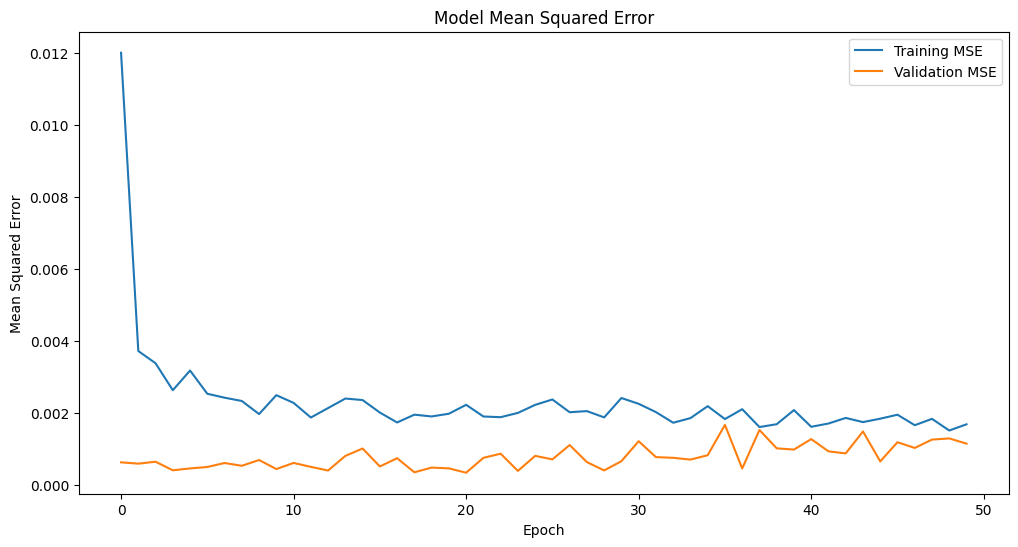

In [27]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(ADA_history.history['loss'], label='Training Loss')
plt.plot(ADA_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot training & validation mean squared error values
plt.figure(figsize=(12, 6))
plt.plot(ADA_history.history['mean_squared_error'], label='Training MSE')
plt.plot(ADA_history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Training MSE', 'Validation MSE'], loc='upper right')
plt.show()


In [28]:
# Evaluate the model
loss = model.evaluate(X_test_ADA, y_test_ADA)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test_ADA)

15/15 [==============================] - 0s 1ms/step - loss: 0.0194 - mean_squared_error: 0.0011
Test Loss: [0.01943749189376831, 0.0010735553223639727]
15/15 [==============================] - 0s 868us/step


#### 3-8 Predicting the last day price with feeding the day before last day features into the ADA Feed-forward model

In [29]:
ADA_new_data = ADA_features_scaled[-2].reshape(1, -1)

# Make a prediction
predicted_scaled = model.predict(ADA_new_data)

# Inverse transform the predicted value to get the original scale
predicted_original = ADA_target_scaler.inverse_transform(predicted_scaled)

print(f'Predicted next closing price: {predicted_original[0][0]}')

1/1 [==============================] - 0s 21ms/step
Predicted next closing price: 0.39125335216522217


We expected $0.438 as the last day closing price while the feed-forward model predicted $0.371.

#### 3-9 Implementing LSTM for ADA

In order to prepare data for training an LSTM model, we need a tensor including Features, Target, and the time step. So, using the following function we are preparing data for traning the LSTM Model.

In [30]:
# Convert to sequences
def create_sequences(features, target, n_steps):
    X, y = [], []
    for i in range(len(features) - n_steps):
        X.append(features[i:i + n_steps])
        y.append(target[i + n_steps])
    return np.array(X), np.array(y)

# Define the sequence length (e.g., 60 days)
n_steps = 30

# Create sequences
X_ADA, y_ADA = create_sequences(ADA_features_scaled, ADA_target_scaled, n_steps)

# Train-test split
X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(X_ADA, y_ADA, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train_ADA.shape}')
print(f'y_train shape: {y_train_ADA.shape}')
print(f'X_test shape: {X_test_ADA.shape}')
print(f'y_test shape: {y_test_ADA.shape}')

X_train shape: (1873, 30, 7)
y_train shape: (1873, 1)
X_test shape: (469, 30, 7)
y_test shape: (469, 1)


#### 3-10 Designing the LSTM Model architecture and training the model

In [31]:
# Build the LSTM model
ADA_LSTM_model = Sequential()
ADA_LSTM_model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train_ADA.shape[1], X_train_ADA.shape[2])))
ADA_LSTM_model.add(Dropout(0.1))
ADA_LSTM_model.add(LSTM(units=64, return_sequences=True))
ADA_LSTM_model.add(Dropout(0.1))
ADA_LSTM_model.add(Dense(units=32, activation='relu'))
ADA_LSTM_model.add(Dense(units=1))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
ADA_LSTM_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
ADA_LSTM_history = ADA_LSTM_model.fit(X_train_ADA, y_train_ADA, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
24/24 [==============================] - 6s 92ms/step - loss: 0.0127 - val_loss: 0.0067
Epoch 2/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0061 - val_loss: 0.0052
Epoch 3/50
24/24 [==============================] - 2s 68ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 4/50
24/24 [==============================] - 1s 61ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 5/50
24/24 [==============================] - 1s 62ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 6/50
24/24 [==============================] - 2s 64ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 7/50
24/24 [==============================] - 2s 66ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 8/50
24/24 [==============================] - 2s 65ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 9/50
24/24 [==============================] - 2s 64ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 10/50
24/24 [==============================] - 2s 63ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 11/

#### 3-11 Plotting the training curves for ADA LSTM model

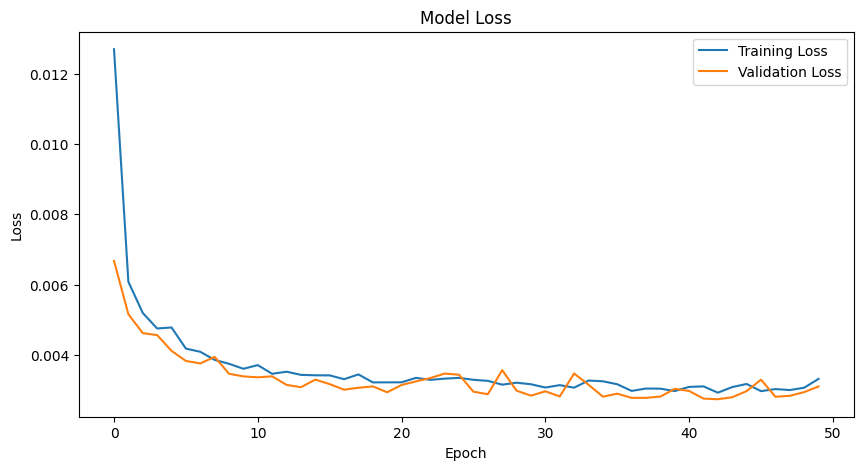

In [32]:
# Plot the learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ADA_LSTM_history.history['loss'], label='Training Loss')
plt.plot(ADA_LSTM_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Comparing the training curves for the ADA LSTM model with the feed-forward model shows that the model learned the data way better. It could be seen either by the more smooth behaviour of validation loss graph as well as the actual value of the training and validation loss which is lower than the feed forward model.

#### 3-12 Predicting the last day closing price feeding the features of the day before

In [33]:
# Define the number of steps
n_steps = 30

# Calculate the end index
end_index = len(ADA_features_scaled) - 1  # Index of the row before the last row

# Calculate the start index to include `n_steps` rows
start_index = end_index - n_steps + 1  # Ensure this gives exactly `n_steps` rows

# Extract the sequence of `n_steps` rows
sequence = ADA_features_scaled[start_index:end_index + 1]  # end_index + 1 to include the row at end_index

# Check the shape of the sequence
print(f'Sequence shape: {sequence.shape}')

# Prepare the data point for the model
# Ensure the shape is (1, n_steps, number_of_features)
ADA_data_point = np.expand_dims(sequence, axis=0)

# Make the prediction
ADA_predicted_scaled = ADA_LSTM_model.predict(ADA_data_point)

# Reshape predicted_scaled to (1, 1) before inverse transforming
ADA_predicted_scaled_reshaped = ADA_predicted_scaled.reshape(-1, 1)

# Inverse transform the prediction to get the original scale
ADA_predicted = ADA_target_scaler.inverse_transform(ADA_predicted_scaled_reshaped)

print(f'Predicted closing price for the next day after the row before the last: {ADA_predicted[0][0]}')


Sequence shape: (30, 7)
1/1 [==============================] - 1s 1s/step
Predicted closing price for the next day after the row before the last: 0.40169015526771545


The ADA LSTM model performed better in predicting the last price rather than the feed forward model. But the difference is not too much, and it was expected as the difference in the loss function is not that much.

## 4-Bitcoin

From this point, investigating the Bitcoin (BTC) dataset and training its models starts.

In [34]:
BTC.head()

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921


#### 4-1 Feature Engineering
In order to include the impact of the previous days prices in the simple feed-forward neural network model, the MA5, MA10, and MA20 features have been generated which are the average of closing price for past 5, 10, and 20 days. As a result, to not have a null data, the first 19 days has been removed from the dataset (as they don't have the past 20 days price average).

In [35]:
# Feature engineering for ADA
BTC['BTC MA5'] = BTC['close'].rolling(window=5).mean()
BTC['BTC MA10'] = BTC['close'].rolling(window=10).mean()
BTC['BTC MA20'] = BTC['close'].rolling(window=20).mean()
BTC = BTC.dropna()

In [36]:
BTC.head()

,ticker,date,open,high,low,close,BTC MA5,BTC MA10,BTC MA20
19,BTC,2010-08-05,0.0570,0.0610,0.0570,0.0610,0.05982,0.061845,0.063135
20,BTC,2010-08-06,0.0610,0.0624,0.0607,0.0623,0.06006,0.062075,0.063775
21,BTC,2010-08-07,0.0623,0.0623,0.0590,0.0590,0.05986,0.062085,0.062433
22,BTC,2010-08-08,0.0590,0.0610,0.0590,0.0609,0.06004,0.061185,0.061438
23,BTC,2010-08-09,0.0609,0.0735,0.0593,0.0710,0.06284,0.062015,0.061251


#### 4-2 Plotting the features (Prices) over the time

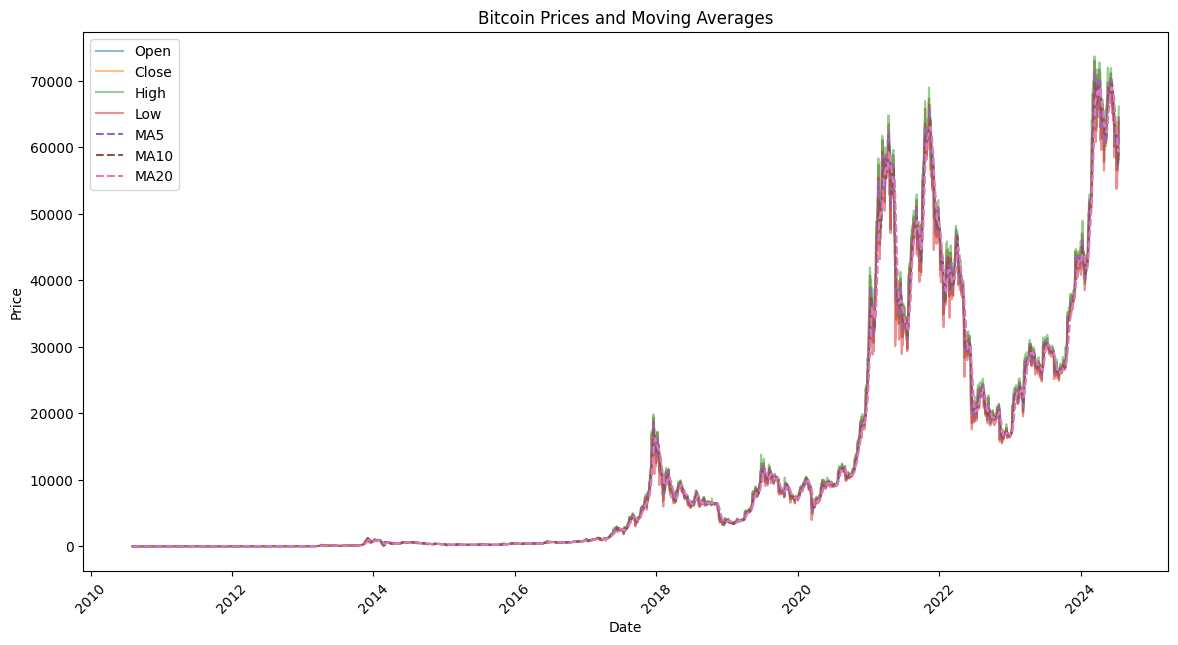

In [37]:
# Parse the Date column to datetime
BTC['date'] = pd.to_datetime(BTC['date'])

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot Open, Close, High, Low prices
plt.plot(BTC['date'], BTC['open'], label='Open', alpha=0.5)
plt.plot(BTC['date'], BTC['close'], label='Close', alpha=0.5)
plt.plot(BTC['date'], BTC['high'], label='High', alpha=0.5)
plt.plot(BTC['date'], BTC['low'], label='Low', alpha=0.5)

# Plot Moving Averages
plt.plot(BTC['date'], BTC['BTC MA5'], label='MA5', linestyle='--')
plt.plot(BTC['date'], BTC['BTC MA10'], label='MA10', linestyle='--')
plt.plot(BTC['date'], BTC['BTC MA20'], label='MA20', linestyle='--')

# Add titles and labels
plt.title('Bitcoin Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


#### 4-3 Adding the next day close price as the target of each day features

In [38]:
# Create the target variable (next day's closing price)

BTC['Next_Close'] = BTC['close'].shift(-1)
BTC = BTC.dropna()

In [39]:
BTC.isnull().sum()

ticker        0
date          0
open          0
high          0
low           0
close         0
BTC MA5       0
BTC MA10      0
BTC MA20      0
Next_Close    0
dtype: int64

In [40]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5095 entries, 19 to 5113
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ticker      5095 non-null   object        
 1   date        5095 non-null   datetime64[ns]
 2   open        5095 non-null   float64       
 3   high        5095 non-null   float64       
 4   low         5095 non-null   float64       
 5   close       5095 non-null   float64       
 6   BTC MA5     5095 non-null   float64       
 7   BTC MA10    5095 non-null   float64       
 8   BTC MA20    5095 non-null   float64       
 9   Next_Close  5095 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 437.9+ KB


In [41]:
# Select features and target

BTC_features = BTC[['open', 'low', 'high', 'close', 'BTC MA5', 'BTC MA10', 'BTC MA20']]
BTC_target = BTC['Next_Close']

In [42]:
print(f'Bitcoin (BTC) Features Shape: {BTC_features.shape}')
print(f'Bitcoin (BTC) Target Shape: {BTC_target.shape}')

Bitcoin (BTC) Features Shape: (5095, 7)
Bitcoin (BTC) Target Shape: (5095,)


In [43]:
BTC_features

,open,low,high,close,BTC MA5,BTC MA10,BTC MA20
19,0.0570,0.0570,0.0610,0.0610,0.05982,0.061845,0.063135
20,0.0610,0.0607,0.0624,0.0623,0.06006,0.062075,0.063775
21,0.0623,0.0590,0.0623,0.0590,0.05986,0.062085,0.062433
22,0.0590,0.0590,0.0610,0.0609,0.06004,0.061185,0.061438
23,0.0609,0.0593,0.0735,0.0710,0.06284,0.062015,0.061251
...,...,...,...,...,...,...,...
5109,57458.3000,56542.5000,58542.5000,57612.9000,57390.92000,57658.010000,59638.685000
5110,57608.0000,57590.9000,58971.9000,58696.6000,57799.28000,57509.600000,59383.485000
5111,58693.3000,58298.1000,61428.6000,61299.0000,58499.32000,57793.430000,59445.630000
5112,61333.1000,60664.2000,63855.9000,63564.2000,59726.20000,58497.400000,59528.570000


#### 4-4 Normalizing Features and Target

In [44]:
# Normalizing the features
BTC_scaler = MinMaxScaler()
BTC_features_scaled = BTC_scaler.fit_transform(BTC_features)


In [45]:
# Normalizing Targets
BTC_target_scaler = MinMaxScaler()

target_BTC = BTC_target.values.reshape(-1, 1)
BTC_target_scaled = BTC_target_scaler.fit_transform(target_BTC)

In [46]:
BTC_target_scaled

array([[4.52131960e-08],
       [0.00000000e+00],
       [2.60318401e-08],
       ...,
       [8.70890293e-01],
       [8.83932245e-01],
       [8.81297549e-01]])

#### 4-5 Preparing dataset for training

In [47]:
# Train-test split
X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(BTC_features_scaled, BTC_target_scaled, test_size=0.2, random_state=42)

#### 4-6 Designing the feed-forward Model

In [48]:
# Build the neural network model
BTC_model = Sequential()
BTC_model.add(Dense(units=128, activation='relu'))
BTC_model.add(Dropout(0.2))
BTC_model.add(Dense(units=64, activation='relu'))
BTC_model.add(Dropout(0.2))
BTC_model.add(Dense(units=32, activation='relu'))
BTC_model.add(Dropout(0.2))
BTC_model.add(Dense(units=1))

In [49]:
# Compile the model
BTC_model_optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
BTC_model.compile(optimizer=BTC_model_optimizer, loss='mean_absolute_error', metrics=['mean_squared_error'])

In [50]:
# Train the model
BTC_history = BTC_model.fit(X_train_BTC, y_train_BTC, epochs=50, batch_size=32, validation_split=0.3)


Epoch 1/50
90/90 [==============================] - 2s 6ms/step - loss: 0.0393 - mean_squared_error: 0.0065 - val_loss: 0.0487 - val_mean_squared_error: 0.0064
Epoch 2/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0333 - mean_squared_error: 0.0048 - val_loss: 0.0079 - val_mean_squared_error: 1.8549e-04
Epoch 3/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0295 - mean_squared_error: 0.0038 - val_loss: 0.0336 - val_mean_squared_error: 0.0038
Epoch 4/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0279 - mean_squared_error: 0.0033 - val_loss: 0.0182 - val_mean_squared_error: 9.7755e-04
Epoch 5/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0285 - mean_squared_error: 0.0033 - val_loss: 0.0169 - val_mean_squared_error: 5.8471e-04
Epoch 6/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0274 - mean_squared_error: 0.0032 - val_loss: 0.0153 - val_mean_squared_error: 5.8902e-04
Epoch 7/50
90/90 [======

#### 4-7 Plotting the training curves to understand the model performance

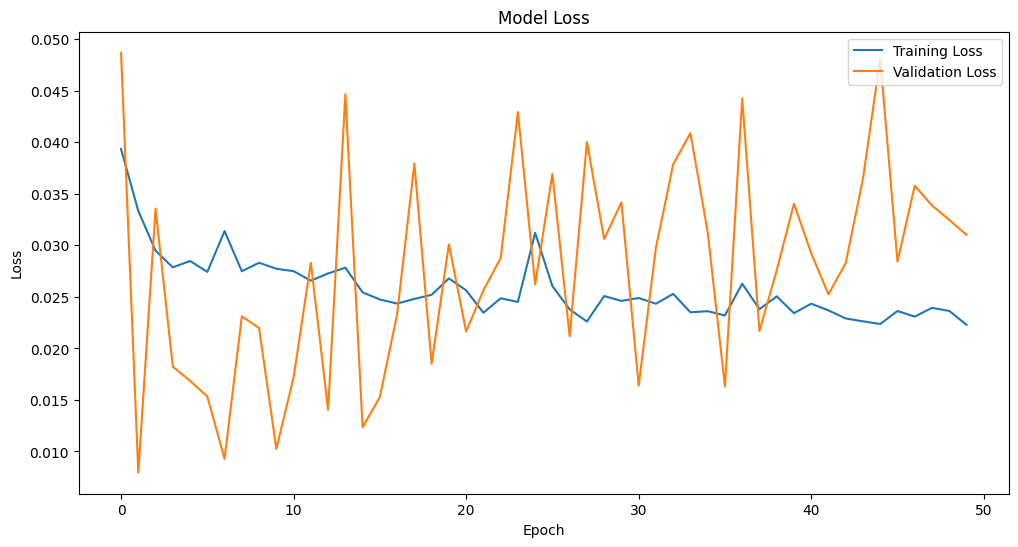

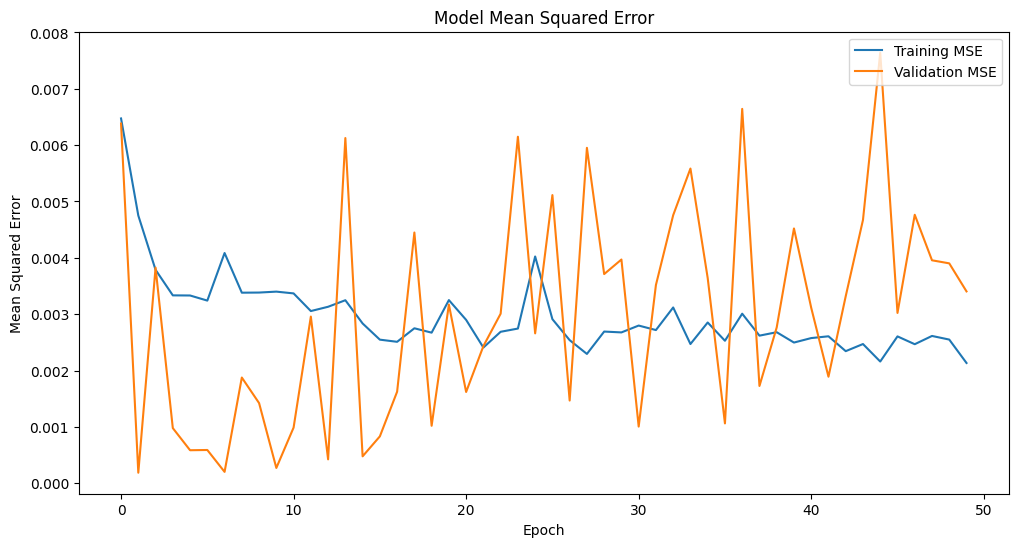

In [51]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(BTC_history.history['loss'], label='Training Loss')
plt.plot(BTC_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot training & validation mean squared error values
plt.figure(figsize=(12, 6))
plt.plot(BTC_history.history['mean_squared_error'], label='Training MSE')
plt.plot(BTC_history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Training MSE', 'Validation MSE'], loc='upper right')
plt.show()


In [52]:
# Evaluate the model
loss = BTC_model.evaluate(X_test_BTC, y_test_BTC)
print(f'Test Loss: {loss}')

# Make predictions
predictions = BTC_model.predict(X_test_BTC)

32/32 [==============================] - 0s 1ms/step - loss: 0.0317 - mean_squared_error: 0.0037
Test Loss: [0.031734805554151535, 0.003708550240844488]
32/32 [==============================] - 0s 1ms/step


#### 4-8 Predicting the last day price with feeding the day before last day features into the ADA Feed-forward model

In [53]:
BTC_new_data = BTC_features_scaled[-2].reshape(1, -1)

# Make a prediction
BTC_predicted_scaled = BTC_model.predict(BTC_new_data)

# Inverse transform the predicted value to get the original scale
BTC_predicted_original = BTC_target_scaler.inverse_transform(BTC_predicted_scaled)

print(f'Predicted next closing price: {BTC_predicted_original[0][0]}')

1/1 [==============================] - 0s 24ms/step
Predicted next closing price: 49389.25390625


#### 4-9 Implementing LSTM for BTC

In order to prepare data for training an LSTM model, we need a tensor including Features, Target, and the time step. So, using the following function we are preparing data for traning the LSTM Model.

In [54]:
# Convert to sequences
def create_sequences(features, target, n_steps):
    X, y = [], []
    for i in range(len(features) - n_steps):
        X.append(features[i:i + n_steps])
        y.append(target[i + n_steps])
    return np.array(X), np.array(y)

# Define the sequence length (e.g., 60 days)
BTC_n_steps = 30

# Create sequences
X_BTC, y_BTC = create_sequences(BTC_features_scaled, BTC_target_scaled, BTC_n_steps)

# Train-test split
X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(X_BTC, y_BTC, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train_BTC.shape}')
print(f'y_train shape: {y_train_BTC.shape}')
print(f'X_test shape: {X_test_BTC.shape}')
print(f'y_test shape: {y_test_BTC.shape}')

X_train shape: (4052, 30, 7)
y_train shape: (4052, 1)
X_test shape: (1013, 30, 7)
y_test shape: (1013, 1)


#### 4-10 Designing the LSTM Model architecture and training the model

Epoch 1/50
51/51 [==============================] - 8s 77ms/step - loss: 0.0113 - val_loss: 0.0054
Epoch 2/50
51/51 [==============================] - 3s 61ms/step - loss: 0.0050 - val_loss: 0.0038
Epoch 3/50
51/51 [==============================] - 3s 63ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 4/50
51/51 [==============================] - 3s 63ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 5/50
51/51 [==============================] - 3s 69ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 6/50
51/51 [==============================] - 3s 64ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 7/50
51/51 [==============================] - 3s 62ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 8/50
51/51 [==============================] - 3s 63ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 9/50
51/51 [==============================] - 3s 67ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 10/50
51/51 [==============================] - 3s 63ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 11/

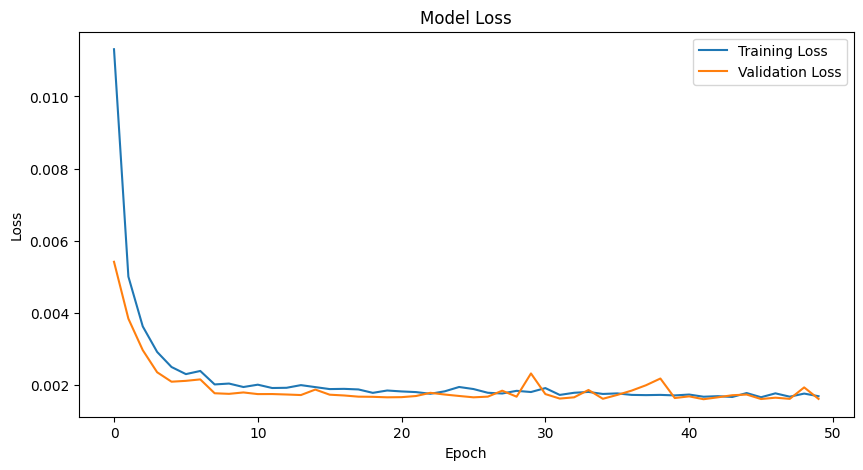

In [55]:
# Build the LSTM model
BTC_LSTM_model = Sequential()
BTC_LSTM_model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train_BTC.shape[1], X_train_BTC.shape[2])))
BTC_LSTM_model.add(Dropout(0.1))
BTC_LSTM_model.add(LSTM(units=64, return_sequences=True))
BTC_LSTM_model.add(Dropout(0.1))
BTC_LSTM_model.add(Dense(units=32, activation='relu'))
BTC_LSTM_model.add(Dense(units=1))

# Compile the model
BTC_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
BTC_LSTM_model.compile(optimizer = BTC_optimizer, loss='mean_squared_error')

# Train the model
BTC_history = BTC_LSTM_model.fit(X_train_BTC, y_train_BTC, epochs=50, batch_size=64, validation_split=0.2)

plt.figure(figsize=(10, 5))
plt.plot(BTC_history.history['loss'], label='Training Loss')
plt.plot(BTC_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### 4-11 Predicting the last day closing price feeding the features of the day before

In [56]:
# Define the number of steps
BTC_n_steps = 30

# Calculate the end index
BTC_end_index = len(BTC_features_scaled) - 1  # Index of the row before the last row

# Calculate the start index to include `n_steps` rows
BTC_start_index = BTC_end_index - BTC_n_steps + 1  # Ensure this gives exactly `n_steps` rows

# Extract the sequence of `n_steps` rows
BTC_sequence = BTC_features_scaled[BTC_start_index:BTC_end_index + 1]  # end_index + 1 to include the row at end_index

# Check the shape of the sequence
print(f'Sequence shape: {BTC_sequence.shape}')

# Prepare the data point for the model
# Ensure the shape is (1, n_steps, number_of_features)
BTC_data_point = np.expand_dims(BTC_sequence, axis=0)

# Make the prediction
BTC_predicted_scaled = BTC_LSTM_model.predict(BTC_data_point)

# Reshape predicted_scaled to (1, 1) before inverse transforming
BTC_predicted_scaled_reshaped = BTC_predicted_scaled.reshape(-1, 1)

# Inverse transform the prediction to get the original scale
BTC_predicted = BTC_target_scaler.inverse_transform(BTC_predicted_scaled_reshaped)

print(f'Predicted closing price for the next day after the row before the last: {BTC_predicted[0][0]}')


Sequence shape: (30, 7)
1/1 [==============================] - 1s 1s/step
Predicted closing price for the next day after the row before the last: 62519.7578125


The BTC LSTM model performed better in predicting the last price rather than the feed forward model. The feed forward model predicted $49389 while the LSTM model predicted the $62519 for the closing price. The actual closing price is $64516. 

# 5- Ethereum

From this point, investigating the Bitcoin (BTC) dataset and training its models starts.

In [57]:
ETH.head()

,ticker,date,open,high,low,close
0,ETH,2015-08-07,3.0,3.0,3.0000,3.00
1,ETH,2015-08-08,3.0,3.0,1.2000,1.20
2,ETH,2015-08-09,1.2,1.2,1.2000,1.20
3,ETH,2015-08-10,1.2,1.2,1.2000,1.20
4,ETH,2015-08-11,1.2,1.2,0.6504,0.99


#### 5-1 Feature Engineering
In order to include the impact of the previous days prices in the simple feed-forward neural network model, the MA5, MA10, and MA20 features have been generated which are the average of closing price for past 5, 10, and 20 days. As a result, to not have a null data, the first 19 days has been removed from the dataset (as they don't have the past 20 days price average).

In [58]:
# Feature engineering for ADA
ETH['ETH MA5'] = ETH['close'].rolling(window=5).mean()
ETH['ETH MA10'] = ETH['close'].rolling(window=10).mean()
ETH['ETH MA20'] = ETH['close'].rolling(window=20).mean()
ETH = ETH.dropna()

In [59]:
ETH.head()

,ticker,date,open,high,low,close,ETH MA5,ETH MA10,ETH MA20
19,ETH,2015-08-26,1.27,1.27,1.08,1.18,1.288,1.330,1.4505
20,ETH,2015-08-27,1.18,1.19,1.14,1.14,1.236,1.314,1.3575
21,ETH,2015-08-28,1.14,1.30,1.14,1.30,1.226,1.308,1.3625
22,ETH,2015-08-29,1.30,1.30,1.15,1.18,1.214,1.302,1.3615
23,ETH,2015-08-30,1.18,1.35,1.17,1.32,1.224,1.282,1.3675


#### 5-2 Plotting the features (Prices) over the time

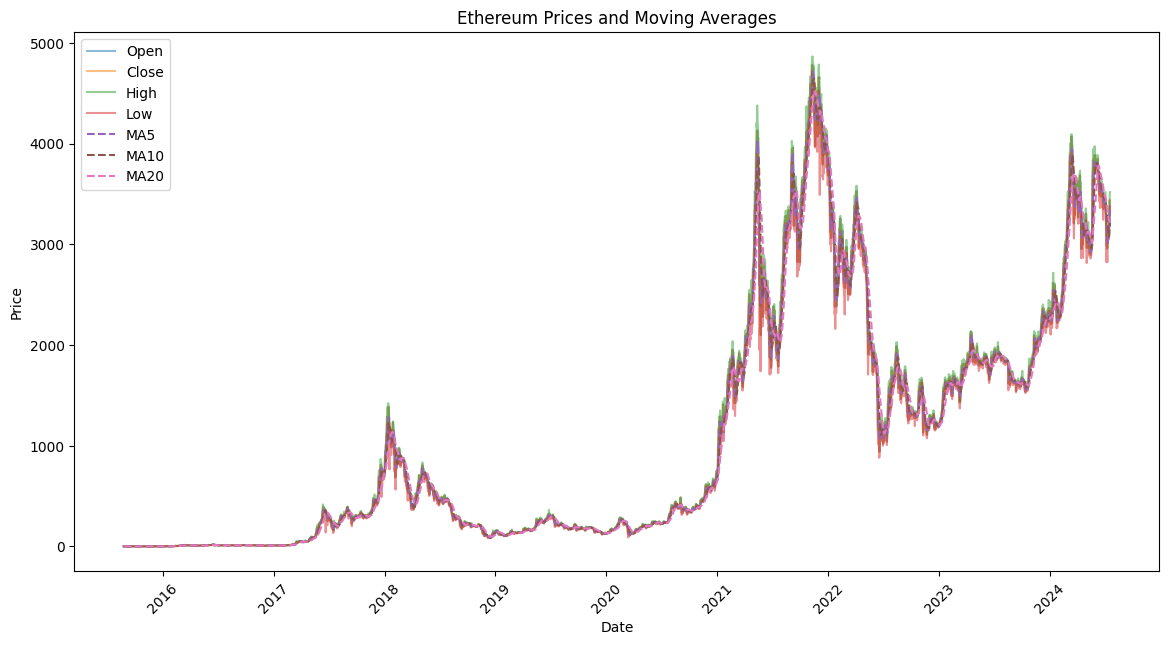

In [60]:
# Parse the Date column to datetime
ETH['date'] = pd.to_datetime(ETH['date'])

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot Open, Close, High, Low prices
plt.plot(ETH['date'], ETH['open'], label='Open', alpha=0.5)
plt.plot(ETH['date'], ETH['close'], label='Close', alpha=0.5)
plt.plot(ETH['date'], ETH['high'], label='High', alpha=0.5)
plt.plot(ETH['date'], ETH['low'], label='Low', alpha=0.5)

# Plot Moving Averages
plt.plot(ETH['date'], ETH['ETH MA5'], label='MA5', linestyle='--')
plt.plot(ETH['date'], ETH['ETH MA10'], label='MA10', linestyle='--')
plt.plot(ETH['date'], ETH['ETH MA20'], label='MA20', linestyle='--')

# Add titles and labels
plt.title('Ethereum Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


#### 5-3 Adding the next day close price as the target of each day features

In [61]:
# Create the target variable (next day's closing price)

ETH['Next_Close'] = ETH['close'].shift(-1)
ETH = ETH.dropna()

In [62]:
ETH.isnull().sum()

ticker        0
date          0
open          0
high          0
low           0
close         0
ETH MA5       0
ETH MA10      0
ETH MA20      0
Next_Close    0
dtype: int64

In [63]:
ETH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3248 entries, 19 to 3266
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ticker      3248 non-null   object        
 1   date        3248 non-null   datetime64[ns]
 2   open        3248 non-null   float64       
 3   high        3248 non-null   float64       
 4   low         3248 non-null   float64       
 5   close       3248 non-null   float64       
 6   ETH MA5     3248 non-null   float64       
 7   ETH MA10    3248 non-null   float64       
 8   ETH MA20    3248 non-null   float64       
 9   Next_Close  3248 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 279.1+ KB


In [64]:
# Select features and target

ETH_features = ETH[['open', 'low', 'high', 'close', 'ETH MA5', 'ETH MA10', 'ETH MA20']]
ETH_target = ETH['Next_Close']

In [65]:
print(f'Ethereum (ETH) Features Shape: {ETH_features.shape}')
print(f'Ethereum (ETH) Target Shape: {ETH_target.shape}')

Ethereum (ETH) Features Shape: (3248, 7)
Ethereum (ETH) Target Shape: (3248,)


In [66]:
ETH_features

,open,low,high,close,ETH MA5,ETH MA10,ETH MA20
19,1.27,1.08,1.27,1.18,1.288,1.330,1.4505
20,1.18,1.14,1.19,1.14,1.236,1.314,1.3575
21,1.14,1.14,1.30,1.30,1.226,1.308,1.3625
22,1.30,1.15,1.30,1.18,1.214,1.302,1.3615
23,1.18,1.17,1.35,1.32,1.224,1.282,1.3675
...,...,...,...,...,...,...,...
3262,3109.67,3045.58,3158.42,3120.27,3082.486,3086.336,3245.8930
3263,3119.39,3114.33,3170.62,3165.94,3110.490,3073.458,3232.5175
3264,3165.37,3144.80,3256.71,3255.16,3149.358,3082.854,3227.7990
3265,3256.71,3234.16,3447.75,3422.11,3214.628,3127.221,3228.8850


#### 5-4 Normalizing Features and Target

In [67]:
# Normalizing the features
ETH_scaler = MinMaxScaler()
ETH_features_scaled = ETH_scaler.fit_transform(ETH_features)


In [68]:
# Normalizing Targets
ETH_target_scaler = MinMaxScaler()

target_ETH = ETH_target.values.reshape(-1, 1)
ETH_target_scaled = ETH_target_scaler.fit_transform(target_ETH)

In [69]:
ETH_target_scaled

array([[1.50638330e-04],
       [1.84113514e-04],
       [1.59007126e-04],
       ...,
       [7.15885649e-01],
       [7.19080437e-01],
       [7.13916889e-01]])

#### 5-5 Preparing dataset for training

In [70]:
# Train-test split
X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH = train_test_split(ETH_features_scaled, ETH_target_scaled, test_size=0.2, random_state=42)

#### 5-6 Designing the feed-forward Model

In [71]:
# Build the neural network model
ETH_model = Sequential()
ETH_model.add(Dense(units=256, activation='relu'))
ETH_model.add(Dropout(0.2))
ETH_model.add(Dense(units=128, activation='relu'))
ETH_model.add(Dropout(0.2))
ETH_model.add(Dense(units=64, activation='relu'))
ETH_model.add(Dropout(0.2))
ETH_model.add(Dense(units=32, activation='relu'))
ETH_model.add(Dropout(0.2))
ETH_model.add(Dense(units=1))

In [72]:
# Compile the model
ETH_model_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
ETH_model.compile(optimizer=ETH_model_optimizer, loss='mean_absolute_error', metrics=['mean_squared_error'])

In [73]:
# Train the model
ETH_history = ETH_model.fit(X_train_ETH, y_train_ETH, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
33/33 [==============================] - 2s 9ms/step - loss: 0.0894 - mean_squared_error: 0.0250 - val_loss: 0.0265 - val_mean_squared_error: 0.0013
Epoch 2/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0552 - mean_squared_error: 0.0097 - val_loss: 0.0391 - val_mean_squared_error: 0.0032
Epoch 3/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0471 - mean_squared_error: 0.0071 - val_loss: 0.0251 - val_mean_squared_error: 0.0015
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0493 - mean_squared_error: 0.0078 - val_loss: 0.0289 - val_mean_squared_error: 0.0021
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0427 - mean_squared_error: 0.0062 - val_loss: 0.0458 - val_mean_squared_error: 0.0049
Epoch 6/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0434 - mean_squared_error: 0.0066 - val_loss: 0.0335 - val_mean_squared_error: 0.0028
Epoch 7/50
33/33 [======================

#### 5-7 Plotting the training curves to understand the model performance

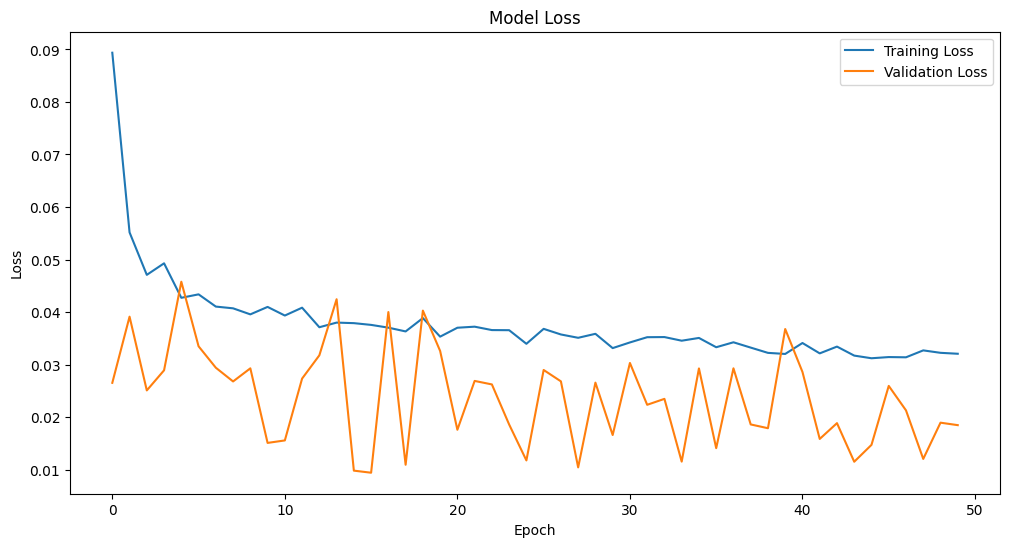

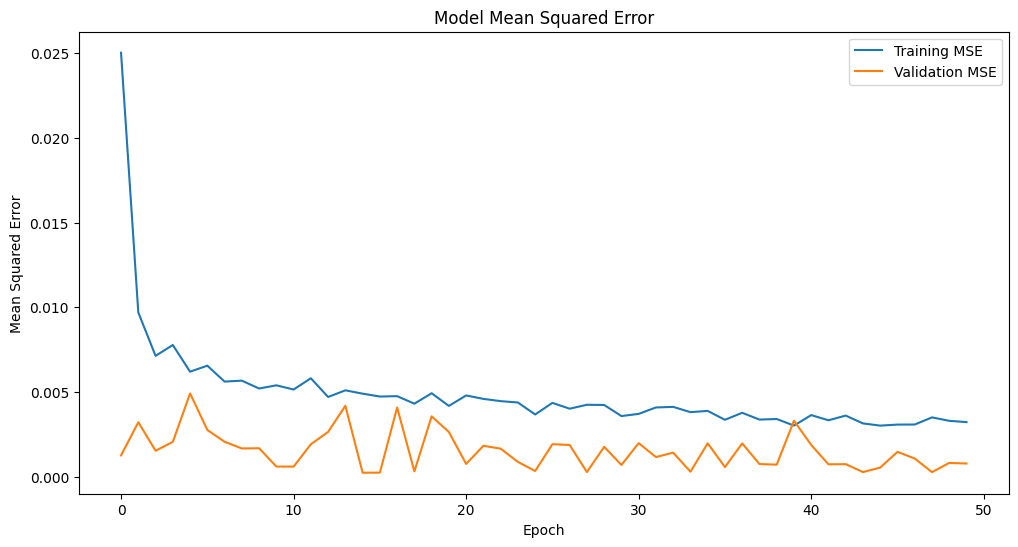

In [74]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(ETH_history.history['loss'], label='Training Loss')
plt.plot(ETH_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot training & validation mean squared error values
plt.figure(figsize=(12, 6))
plt.plot(ETH_history.history['mean_squared_error'], label='Training MSE')
plt.plot(ETH_history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Training MSE', 'Validation MSE'], loc='upper right')
plt.show()


In [75]:
# Evaluate the model
ETH_loss = ETH_model.evaluate(X_test_ETH, y_test_ETH)
print(f'Test Loss: {loss}')

# Make predictions
ETH_predictions = ETH_model.predict(X_test_ETH)

21/21 [==============================] - 0s 1ms/step - loss: 0.0181 - mean_squared_error: 7.2547e-04
Test Loss: [0.031734805554151535, 0.003708550240844488]
21/21 [==============================] - 0s 1ms/step


#### 5-8 Predicting the last day price with feeding the day before last day features into the ADA Feed-forward model

In [76]:
ETH_new_data = ETH_features_scaled[-2].reshape(1, -1)

# Make a prediction
ETH_predicted_scaled = ETH_model.predict(ETH_new_data)

# Inverse transform the predicted value to get the original scale
ETH_predicted_original = ETH_target_scaler.inverse_transform(ETH_predicted_scaled)

print(f'Predicted next closing price: {ETH_predicted_original[0][0]}')

1/1 [==============================] - 0s 26ms/step
Predicted next closing price: 3117.421630859375


#### 5-9 Implementing LSTM for ETH

In order to prepare data for training an LSTM model, we need a tensor including Features, Target, and the time step. So, using the following function we are preparing data for traning the LSTM Model.

In [77]:
# Convert to sequences
def create_sequences(features, target, n_steps):
    X, y = [], []
    for i in range(len(features) - n_steps):
        X.append(features[i:i + n_steps])
        y.append(target[i + n_steps])
    return np.array(X), np.array(y)

# Define the sequence length (e.g., 60 days)
ETH_n_steps = 30

# Create sequences
X_ETH, y_ETH = create_sequences(ETH_features_scaled, ETH_target_scaled, ETH_n_steps)

# Train-test split
X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH = train_test_split(X_ETH, y_ETH, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train_ETH.shape}')
print(f'y_train shape: {y_train_ETH.shape}')
print(f'X_test shape: {X_test_ETH.shape}')
print(f'y_test shape: {y_test_ETH.shape}')

X_train shape: (2574, 30, 7)
y_train shape: (2574, 1)
X_test shape: (644, 30, 7)
y_test shape: (644, 1)


#### 5-10 Designing the LSTM Model architecture and training the model

In [78]:
# Build the LSTM model
ETH_LSTM_model = Sequential()
ETH_LSTM_model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train_ETH.shape[1], X_train_ETH.shape[2])))
ETH_LSTM_model.add(Dropout(0.2))
ETH_LSTM_model.add(LSTM(units=64, return_sequences=True))
ETH_LSTM_model.add(Dropout(0.2))
ETH_LSTM_model.add(Dense(units=32, activation='relu'))
ETH_LSTM_model.add(Dense(units=1))

# Compile the model
ETH_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
ETH_LSTM_model.compile(optimizer = ETH_optimizer, loss='mean_squared_error')

# Train the model
ETH_history = ETH_LSTM_model.fit(X_train_ETH, y_train_ETH, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
33/33 [==============================] - 8s 100ms/step - loss: 0.0228 - val_loss: 0.0102
Epoch 2/50
33/33 [==============================] - 2s 66ms/step - loss: 0.0089 - val_loss: 0.0068
Epoch 3/50
33/33 [==============================] - 2s 67ms/step - loss: 0.0072 - val_loss: 0.0058
Epoch 4/50
33/33 [==============================] - 2s 69ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 5/50
33/33 [==============================] - 2s 70ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 6/50
33/33 [==============================] - 2s 69ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 7/50
33/33 [==============================] - 2s 74ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 8/50
33/33 [==============================] - 2s 69ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 9/50
33/33 [==============================] - 2s 71ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 10/50
33/33 [==============================] - 2s 73ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 11

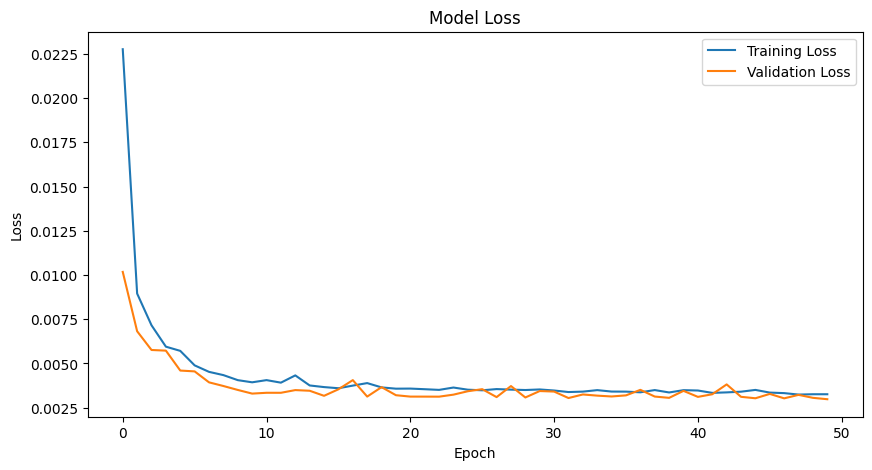

In [79]:
# Plot the learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ETH_history.history['loss'], label='Training Loss')
plt.plot(ETH_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 5-11 Predicting the last day closing price feeding the features of the day before

In [80]:
# Define the number of steps
ETH_n_steps = 30

# Calculate the end index
ETH_end_index = len(ETH_features_scaled) - 1  # Index of the row before the last row

# Calculate the start index to include `n_steps` rows
ETH_start_index = ETH_end_index - ETH_n_steps + 1  # Ensure this gives exactly `n_steps` rows

# Extract the sequence of `n_steps` rows
ETH_sequence = ETH_features_scaled[ETH_start_index:ETH_end_index + 1]  # end_index + 1 to include the row at end_index

# Check the shape of the sequence
print(f'Sequence shape: {ETH_sequence.shape}')

# Prepare the data point for the model
# Ensure the shape is (1, n_steps, number_of_features)
ETH_data_point = np.expand_dims(ETH_sequence, axis=0)

# Make the prediction
ETH_predicted_scaled = ETH_LSTM_model.predict(ETH_data_point)

# Reshape predicted_scaled to (1, 1) before inverse transforming
ETH_predicted_scaled_reshaped = ETH_predicted_scaled.reshape(-1, 1)

# Inverse transform the prediction to get the original scale
ETH_predicted = ETH_target_scaler.inverse_transform(ETH_predicted_scaled_reshaped)

print(f'Predicted closing price for the next day after the row before the last: {ETH_predicted[0][0]}')


Sequence shape: (30, 7)
1/1 [==============================] - 1s 1s/step
Predicted closing price for the next day after the row before the last: 3358.520263671875


The BTC LSTM model performed better in predicting the last price rather than the feed forward model. The feed forward model predicted $3117 while the LSTM model predicted the $3358 for the closing price. The actual closing price is $3437. 